<a href="https://colab.research.google.com/github/hemil19/nlp-projects/blob/master/AnalyticsVidhya_Identify_the_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Identify the Sentiments -Analytics Vidhya

#Competition Link:

https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/

#Private Leaderboard Score: 0.843400896766382

#Approach Used:



*   Cleaning Text Data
*   TF-IDF Vectorizer
*   Logistic Regression       (72% accuracy)
*   Random Forest Classifier  (72% accuracy)
*   Simple Neural Network     (73% accuracy)
*   Word Embedding            (85% accuracy)





In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
train=pd.read_csv('/content/train_2kmZucJ.csv')
test=pd.read_csv('/content/test_oJQbWVk.csv')

In [18]:
train.shape,test.shape

((7920, 3), (1953, 2))

In [19]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [20]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


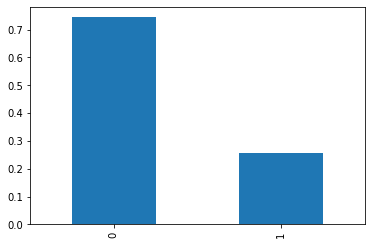

In [130]:
train['label'].value_counts(normalize=True).plot(kind='bar')

#Preprocess text

In [21]:
def clean_text(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = re.sub("http\S+|www.\S+","", text)
    text = ' '.join(text.split())
    text = text.lower()
    text = ' '.join([w for w in text.split() if len(w)>3])
    words = text.split()
    text = " ".join(sorted(set(words), key=words.index))
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

nltk.download('words')
words = set(nltk.corpus.words.words())

def remove_nonenglish(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [22]:
train['clean_text'] = train['tweet'].apply(lambda x: clean_text(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_stopwords(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_nonenglish(x))

train.head()

,id,label,tweet,clean_text
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android beautiful c...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally silicon case thanks uncle
2,3,0,We love this! Would you go? #talk #makememorie...,love would talk unplug relax connect
3,4,0,I'm wired I know I'm George I was made that wa...,wired know made cute home
4,5,1,What amazing service! Apple won't even talk to...,amazing service apple wont even talk question ...


In [23]:
test['clean_text'] = test['tweet'].apply(lambda x: clean_text(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_stopwords(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_nonenglish(x))

test.head()

,id,tweet,clean_text
0,7921,I hate the new #iphone upgrade. Won't let me d...,hate upgrade wont apple
1,7922,currently shitting my fucking pants. #apple #i...,currently pants apple
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",like possible wouldnt block screen
3,7924,My ipod is officially dead. I lost all my pict...,officially dead lost concert camp sobbing
4,7925,Been fighting iTunes all night! I only want th...,fighting night want music


#Negative Review WordCloud

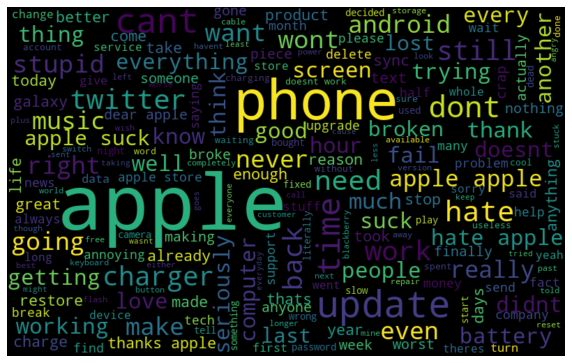

In [30]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in train[train.label==1]['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#Positive Reviews WordCloud

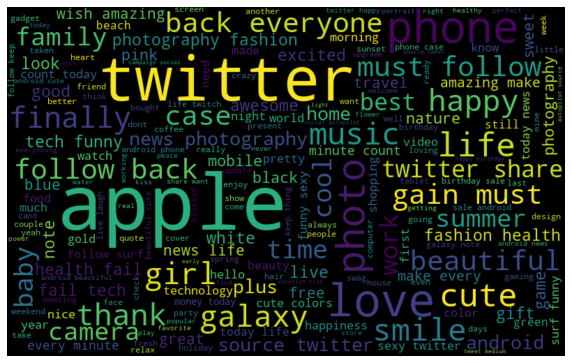

In [32]:
all_words = ' '.join([text for text in train[train.label==0]['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
train.shape

(7920, 4)

In [37]:
X=train['clean_text']
y=train['label']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#TF-IDF Vectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=2, min_df=1, max_features=50,ngram_range=(1,3))
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [52]:
X_train.shape,y_train.shape

((6336, 50), (6336,))

#NLP Modelling

In [53]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
pred = classifier.predict(X_test)
f1_score(y_test, pred, average='weighted'), accuracy_score(y_test, pred)

(0.6124401913875599, 0.7272727272727273)

In [55]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
pred = classifier.predict(X_test)
f1_score(y_test, pred, average='weighted'), accuracy_score(y_test, pred)

(0.6124401913875599, 0.7272727272727273)

#Neural Network Approach

In [56]:
x_train_df = pd.DataFrame(X_train.toarray(), columns=tfidf_vectorizer.get_feature_names())
x_test_df = pd.DataFrame(X_test.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [63]:
x_train_df.shape,x_test_df.shape

((6336, 50), (1584, 50))

In [64]:
y_train.shape,y_test.shape

((6336,), (1584,))

In [65]:
import tensorflow as tf
from tensorflow import keras

In [70]:
tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(
        64, activation='relu',
        input_shape=(x_train_df.shape[-1],)),
    keras.layers.Dense(
        32, activation='relu'),
    keras.layers.Dense(
        16, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3264      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(
    x_train_df,
    y_train,
    epochs=20,
    validation_data=(x_test_df, y_test), 
    verbose=1)

Epoch 1/20
198/198 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7484 - val_loss: 0.5873 - val_accuracy: 0.7273
Epoch 2/20
198/198 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.7484 - val_loss: 0.5863 - val_accuracy: 0.7273
Epoch 3/20
198/198 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.7484 - val_loss: 0.5853 - val_accuracy: 0.7273
Epoch 4/20
198/198 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.7492 - val_loss: 0.5941 - val_accuracy: 0.7273
Epoch 5/20
198/198 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.7494 - val_loss: 0.5863 - val_accuracy: 0.7273
Epoch 6/20
198/198 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7497 - val_loss: 0.5870 - val_accuracy: 0.7273
Epoch 7/20
198/198 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.7492 - val_loss: 0.5927 - val_accuracy: 0.7273
Epoch 

#Word Embedding Approach

In [72]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [73]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [74]:
### Vocabulary size
voc_size=5000

In [75]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train.shape,y_train.shape

((6336,), (6336,))

In [111]:
messages_train=X_train.copy()

messages_test=X_test.copy()

final_test=test['clean_text'].copy()

In [112]:
messages_train.head()

4252    cool wash idea easter alan rock band yoga tech...
4428                                photo birthday nobody
7374            biggest pile planet want throw thing wall
1410        yearbook together friendship schoolmate smile
7896                                apple company nothing
Name: clean_text, dtype: object

In [113]:
final_test.head()

0                      hate upgrade wont apple
1                        currently pants apple
2           like possible wouldnt block screen
3    officially dead lost concert camp sobbing
4                    fighting night want music
Name: clean_text, dtype: object

In [114]:
onehot_repr_train=[one_hot(words,voc_size) for words in messages_train]
onehot_repr_test=[one_hot(words,voc_size) for words in messages_test]
onehot_repr_final=[one_hot(words,voc_size) for words in final_test]

In [115]:
sent_length=10
embedded_docs_train=pad_sequences(onehot_repr_train,padding='pre',maxlen=sent_length)
embedded_docs_test=pad_sequences(onehot_repr_test,padding='pre',maxlen=sent_length)
embedded_docs_final=pad_sequences(onehot_repr_final,padding='pre',maxlen=sent_length)
print(embedded_docs_train[:5],embedded_docs_test[:5])

[[2236 1208 4145 3876 1654 2024  802 2899 1256 2507]
 [   0    0    0    0    0    0    0  195   27 3372]
 [   0    0    0 3345 1208 2227 1570 4464  813 3819]
 [   0    0    0    0    0 2648 1494 1926 4605 4824]
 [   0    0    0    0    0    0    0 3325  320 2878]] [[   0    0    0    0  195 1297   75 1366 2935 2094]
 [   0    0    0    0 1894 2145 3165 3759  228 1494]
 [   0    0    0    0    0 3434 1366 4816   67 2507]
 [   0    0    0 3697   18 3927  790 1040 1570 2080]
 [   0    0    0    0    0    0    0    0 2935 4860]]


In [125]:
## Creating model
embedding_vector_features=10
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(50))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 10, 10)            50000     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_20 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 21        
Total params: 63,241
Trainable params: 63,241
Non-trainable params: 0
_________________________________________________________________
None


In [126]:
X_final=np.array(embedded_docs_train)
y_final=y_train
test_final=np.array(embedded_docs_test)
test_y_final=y_test
print(X_final.shape,y_final.shape,test_final.shape,test_y_final.shape)

(6336, 10) (6336,) (1584, 10) (1584,)


In [127]:
### Finally Training
model.fit(X_final,y_final,validation_data=(test_final,test_y_final),epochs=3,batch_size=64)

Epoch 1/3
99/99 [==============================] - 1s 11ms/step - loss: 0.5364 - accuracy: 0.7505 - val_loss: 0.4033 - val_accuracy: 0.7891
Epoch 2/3
99/99 [==============================] - 1s 7ms/step - loss: 0.3098 - accuracy: 0.8605 - val_loss: 0.3108 - val_accuracy: 0.8630
Epoch 3/3
99/99 [==============================] - 1s 6ms/step - loss: 0.2470 - accuracy: 0.8914 - val_loss: 0.3276 - val_accuracy: 0.8542


In [131]:
prediction=model.predict_classes(embedded_docs_final)

In [132]:
prediction.shape,test.shape

((1953, 1), (1953, 3))

In [133]:
submission=pd.read_csv('/content/sample_submission_LnhVWA4.csv')
submission['label']=prediction
submission.head()

,id,label
0,7921,1
1,7922,0
2,7923,1
3,7924,0
4,7925,0


In [134]:
submission.to_csv('sentiment_01.csv',index=False)